# **Tugas Besar Data Mining Kelompok 9**

---

Anggota :

1. Nathaniel Yusuf Langelo  - 102022480033
2. Achmad Fanial Hubaib     - 102022480027
3. Fikri Muhammad Awaludin  - 1020224800288

In [27]:
import pandas as pd

In [28]:
df = pd.read_csv('Medicaldataset.csv')
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [30]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [31]:
df.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [ ]:
# Melihat jumlah baris dan kolom dataset
df.shape

(1319, 9)

In [33]:
# Hapus baris dengan missing values 
df_cleaned = df.dropna()

In [34]:
# One-hot encoding untuk kolom kategorikal
df_encoded = pd.get_dummies(df_cleaned, columns=['Result'], drop_first=False)

In [35]:
# Normalisasi kolom numerik menggunakan Min-Max Scaling 
# Identifikasi kolom numerik (tanpa kolom hasil encoded)
exclude_cols = ['Result_negative', 'Result_positive']
numerical_cols = [col for col in df_encoded.columns if col not in exclude_cols]

In [36]:
from sklearn.preprocessing import MinMaxScaler
# Scaling
scaler = MinMaxScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

In [37]:
# Final Output 
print("\n== Data Setelah Dipersiapkan ==")
print()
print(df_encoded.head(10))


== Data Setelah Dipersiapkan ==

        Age  Gender  Heart rate  Systolic blood pressure  \
0  0.561798     1.0    0.042163                 0.651934   
1  0.078652     1.0    0.067828                 0.309392   
2  0.460674     1.0    0.040330                 0.651934   
3  0.561798     1.0    0.045830                 0.430939   
4  0.460674     1.0    0.040330                 0.386740   
5  0.494382     0.0    0.037580                 0.386740   
6  0.202247     0.0    0.018332                 0.756906   
7  0.550562     1.0    0.036664                 0.950276   
8  0.337079     0.0    0.036664                 0.618785   
9  0.595506     1.0    0.037580                 0.651934   

   Diastolic blood pressure  Blood sugar     CK-MB  Troponin  Result_negative  \
0                  0.387931     0.247036  0.004935  0.001068             True   
1                  0.068966     0.515810  0.021453  0.102826            False   
2                  0.336207     0.464427  0.005569  0.000194  

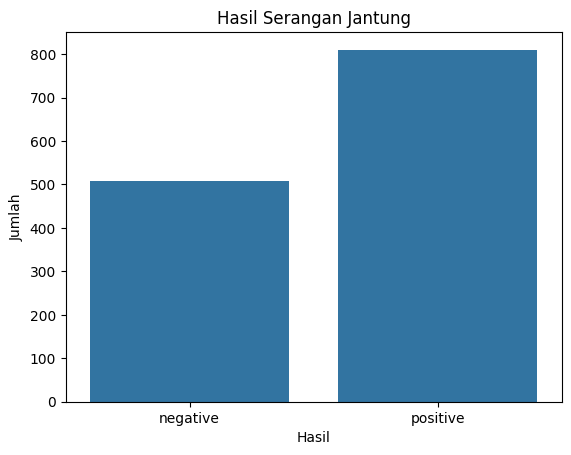

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot hasil serangan Jantung
sns.countplot(x='Result', data=df)
plt.title('Hasil Serangan Jantung')
plt.ylabel('Jumlah')
plt.xlabel('Hasil')
plt.show()

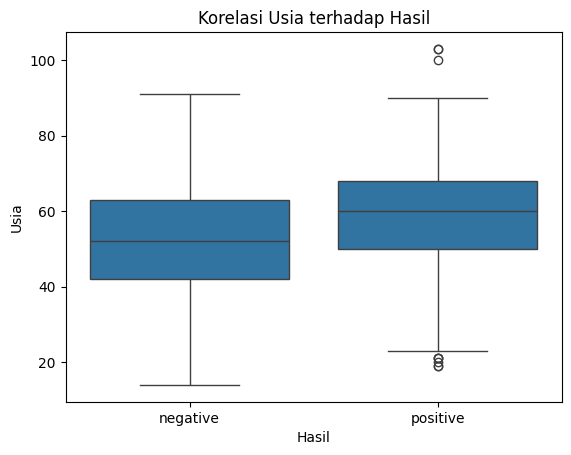

In [ ]:
# Boxplot usia terhadap hasil
sns.boxplot(x='Result', y='Age', data=df)
plt.title('Korelasi Usia terhadap Hasil')
plt.ylabel('Usia')
plt.xlabel('Hasil')
plt.show()

C:\Users\Niel\AppData\Local\Temp\ipykernel_13300\4289703532.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  gender.set_xticklabels(['Perempuan', 'Laki-laki'])


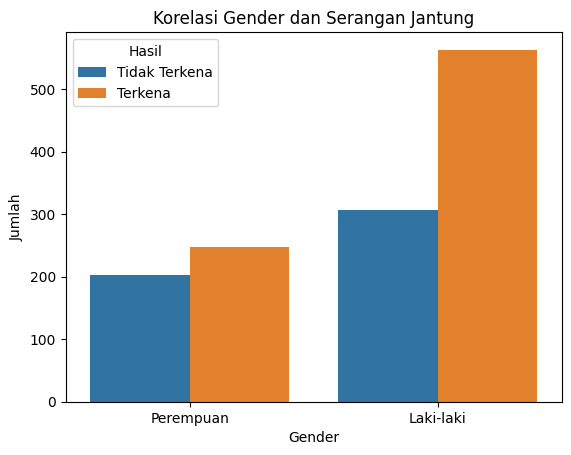

In [ ]:
# Plot Hubungan Gender dan hasil
gender = sns.countplot(x='Gender', hue='Result', data=df)
gender.set_xticklabels(['Perempuan', 'Laki-laki'])
plt.title('Korelasi Gender dan Serangan Jantung')
plt.ylabel('Jumlah')
plt.xlabel('Gender')
plt.legend(title='Hasil', labels=['Tidak Terkena', 'Terkena'])
plt.show()